In [4]:
#Importing the dependencies

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
#Loading the NYPD Dataset
nypd_data = pd.read_csv("/NYPD_Arrest_Data__Year_to_Date_.csv")

In [6]:
#View the Variables
nypd_data.head()

,ARREST_KEY,ARREST_DATE,PD_CD,PD_DESC,KY_CD,OFNS_DESC,LAW_CODE,LAW_CAT_CD,ARREST_BORO,ARREST_PRECINCT,JURISDICTION_CODE,AGE_GROUP,PERP_SEX,PERP_RACE,X_COORD_CD,Y_COORD_CD,Latitude,Longitude,New Georeferenced Column
0,261265483,01/03/2023,397.0,"ROBBERY,OPEN AREA UNCLASSIFIED",105.0,ROBBERY,PL 1600500,F,B,49,0,18-24,M,BLACK,1027430,251104,40.855793,-73.843908,POINT (-73.843908 40.855793)
1,261271301,01/03/2023,105.0,STRANGULATION 1ST,106.0,FELONY ASSAULT,PL 1211200,F,S,120,0,25-44,M,WHITE,962808,174275,40.644996,-74.077263,POINT (-74.077263 40.644996)
2,261336449,01/04/2023,397.0,"ROBBERY,OPEN AREA UNCLASSIFIED",105.0,ROBBERY,PL 1601001,F,K,61,0,<18,M,BLACK,995118,155708,40.594054,-73.960866,POINT (-73.960866 40.594054)
3,261328047,01/04/2023,105.0,STRANGULATION 1ST,106.0,FELONY ASSAULT,PL 1211200,F,Q,114,0,18-24,M,BLACK,1007694,219656,40.769552,-73.915361,POINT (-73.915361 40.769552)
4,261417496,01/05/2023,244.0,"BURGLARY,UNCLASSIFIED,UNKNOWN",107.0,BURGLARY,PL 1402000,F,B,44,0,25-44,F,BLACK,1007174,239542,40.824135,-73.917170,POINT (-73.91717 40.824135)


In [7]:
# Display data types and summary statistics
nypd_data.info()

# Summary statistics for numerical columns
nypd_data.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 226872 entries, 0 to 226871
Data columns (total 19 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   ARREST_KEY                226872 non-null  int64  
 1   ARREST_DATE               226872 non-null  object 
 2   PD_CD                     226870 non-null  float64
 3   PD_DESC                   226872 non-null  object 
 4   KY_CD                     226855 non-null  float64
 5   OFNS_DESC                 226872 non-null  object 
 6   LAW_CODE                  226872 non-null  object 
 7   LAW_CAT_CD                225273 non-null  object 
 8   ARREST_BORO               226872 non-null  object 
 9   ARREST_PRECINCT           226872 non-null  int64  
 10  JURISDICTION_CODE         226872 non-null  int64  
 11  AGE_GROUP                 226872 non-null  object 
 12  PERP_SEX                  226872 non-null  object 
 13  PERP_RACE                 226872 non-null  o

,ARREST_KEY,PD_CD,KY_CD,ARREST_PRECINCT,JURISDICTION_CODE,X_COORD_CD,Y_COORD_CD,Latitude,Longitude
count,2.268720e+05,226870.000000,226855.000000,226872.000000,226872.000000,2.268720e+05,226872.000000,226872.000000,226872.000000
mean,2.706479e+08,424.754401,249.345132,63.430529,0.928537,1.005787e+06,208289.084321,40.738154,-73.921915
std,5.304010e+06,274.475381,147.686733,34.635045,7.538569,2.150944e+04,29744.718873,0.118237,0.173338
min,2.611809e+08,1.000000,101.000000,1.000000,0.000000,0.000000e+00,0.000000,0.000000,-74.253256
25%,2.661655e+08,114.000000,113.000000,40.000000,0.000000,9.913475e+05,186051.250000,40.677251,-73.974396
50%,2.707012e+08,397.000000,236.000000,62.000000,0.000000,1.005407e+06,206887.000000,40.734456,-73.923618
75%,2.752159e+08,705.000000,344.000000,101.000000,0.000000,1.017925e+06,236149.000000,40.814845,-73.878486
max,2.797797e+08,997.000000,995.000000,123.000000,97.000000,1.067220e+06,271819.000000,40.912714,0.000000


In [8]:
# Check for missing values
missing_values = nypd_data.isnull().sum()
missing_values

ARREST_KEY                     0
ARREST_DATE                    0
PD_CD                          2
PD_DESC                        0
KY_CD                         17
OFNS_DESC                      0
LAW_CODE                       0
LAW_CAT_CD                  1599
ARREST_BORO                    0
ARREST_PRECINCT                0
JURISDICTION_CODE              0
AGE_GROUP                      0
PERP_SEX                       0
PERP_RACE                      0
X_COORD_CD                     0
Y_COORD_CD                     0
Latitude                       0
Longitude                      0
New Georeferenced Column       0
dtype: int64

In [9]:
# Fill missing values for PD_CD and KY_CD with mode
pd_cd_mode = nypd_data['PD_CD'].mode()[0]
ky_cd_mode = nypd_data['KY_CD'].mode()[0]
nypd_data['PD_CD'].fillna(pd_cd_mode, inplace=True)
nypd_data['KY_CD'].fillna(ky_cd_mode, inplace=True)

# Fill missing values for LAW_CAT_CD with 'UNKNOWN'
nypd_data['LAW_CAT_CD'].fillna('UNKNOWN', inplace=True)

# Verify there are no missing values
missing_values_after = nypd_data.isnull().sum()

missing_values_after

ARREST_KEY                  0
ARREST_DATE                 0
PD_CD                       0
PD_DESC                     0
KY_CD                       0
OFNS_DESC                   0
LAW_CODE                    0
LAW_CAT_CD                  0
ARREST_BORO                 0
ARREST_PRECINCT             0
JURISDICTION_CODE           0
AGE_GROUP                   0
PERP_SEX                    0
PERP_RACE                   0
X_COORD_CD                  0
Y_COORD_CD                  0
Latitude                    0
Longitude                   0
New Georeferenced Column    0
dtype: int64

In [10]:
# Descriptive statistics for categorical columns
nypd_data.describe(include=['object'])

,ARREST_DATE,PD_DESC,OFNS_DESC,LAW_CODE,LAW_CAT_CD,ARREST_BORO,AGE_GROUP,PERP_SEX,PERP_RACE,New Georeferenced Column
count,226872,226872,226872,226872,226872,226872,226872,226872,226872,226872
unique,365,248,64,1108,7,5,5,3,7,43225
top,05/03/2023,ASSAULT 3,ASSAULT 3 & RELATED OFFENSES,PL 1200001,M,K,25-44,M,BLACK,POINT (-73.881509 40.671404)
freq,983,24744,33839,24207,124481,62395,130490,183942,108545,1560


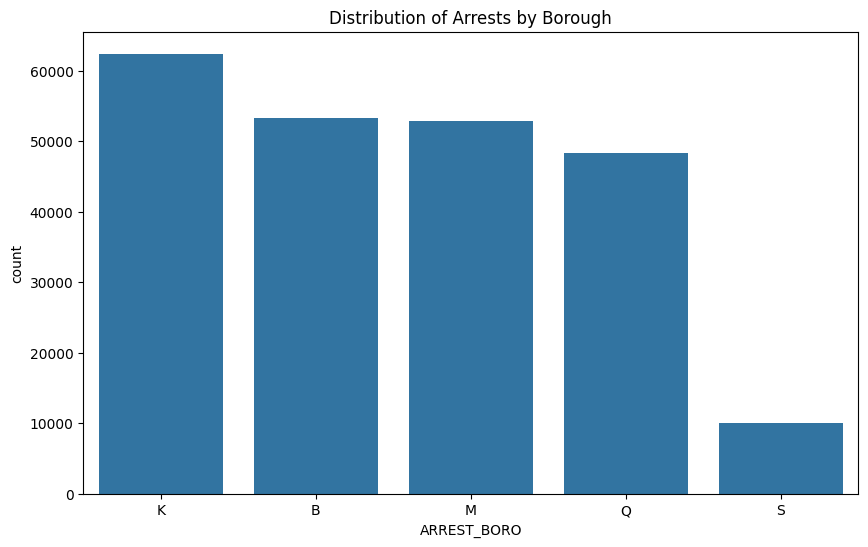

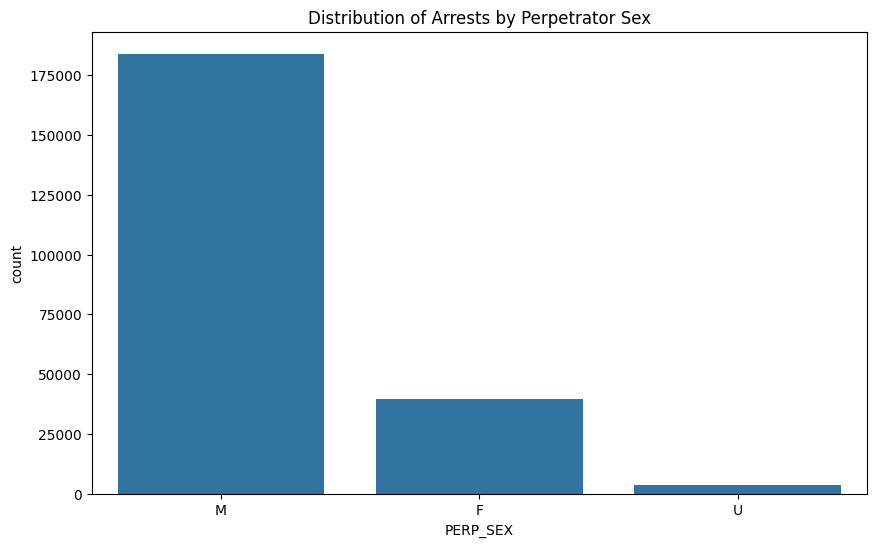

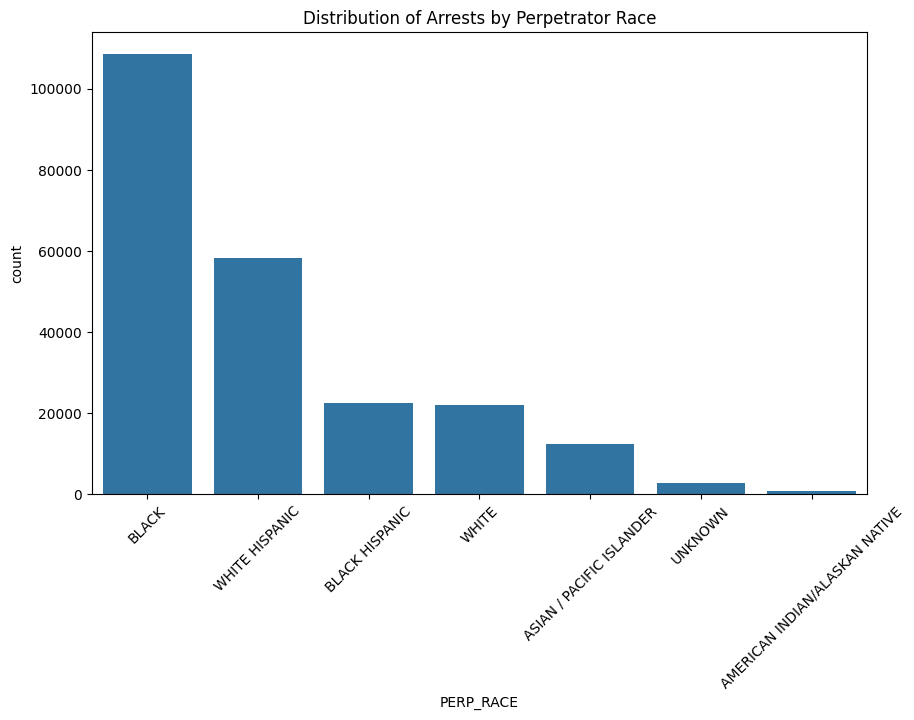

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns

# Bar plot for ARREST_BORO
plt.figure(figsize=(10, 6))
sns.countplot(data=nypd_data, x='ARREST_BORO', order=nypd_data['ARREST_BORO'].value_counts().index)
plt.title('Distribution of Arrests by Borough')
plt.show()

# Bar plot for PERP_SEX
plt.figure(figsize=(10, 6))
sns.countplot(data=nypd_data, x='PERP_SEX', order=nypd_data['PERP_SEX'].value_counts().index)
plt.title('Distribution of Arrests by Perpetrator Sex')
plt.show()

# Bar plot for PERP_RACE
plt.figure(figsize=(10, 6))
sns.countplot(data=nypd_data, x='PERP_RACE', order=nypd_data['PERP_RACE'].value_counts().index)
plt.title('Distribution of Arrests by Perpetrator Race')
plt.xticks(rotation=45)
plt.show()


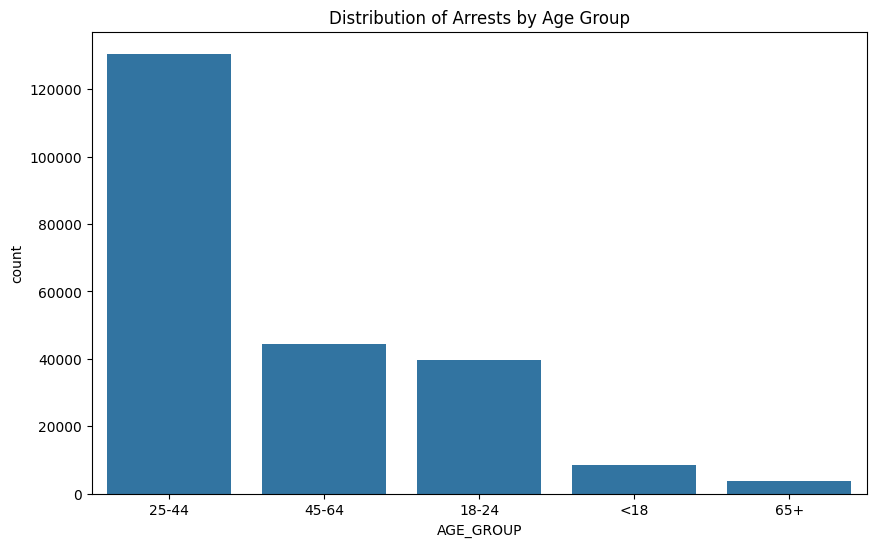

In [12]:
# Distribution of Age Group
plt.figure(figsize=(10, 6))
sns.countplot(data=nypd_data, x='AGE_GROUP', order=nypd_data['AGE_GROUP'].value_counts().index)
plt.title('Distribution of Arrests by Age Group')
plt.show()

In [13]:
# Strip leading/trailing spaces from column names
nypd_data.columns = nypd_data.columns.str.strip()

# Extract useful features from ARREST_DATE
nypd_data['ARREST_DATE'] = pd.to_datetime(nypd_data['ARREST_DATE'])
nypd_data['ARREST_YEAR'] = nypd_data['ARREST_DATE'].dt.year
nypd_data['ARREST_MONTH'] = nypd_data['ARREST_DATE'].dt.month
nypd_data['ARREST_DAY'] = nypd_data['ARREST_DATE'].dt.day
nypd_data['ARREST_DAYOFWEEK'] = nypd_data['ARREST_DATE'].dt.dayofweek

# Drop columns that won't be used in the model
columns_to_drop = ['ARREST_KEY', 'ARREST_DATE', 'Latitude', 'Longitude', 'New Georeferenced Column']
nypd_data = nypd_data.drop(columns=columns_to_drop)

# Convert categorical variables to numerical using one-hot encoding
categorical_columns = ['PD_DESC', 'OFNS_DESC', 'LAW_CODE', 'LAW_CAT_CD', 'ARREST_BORO', 'AGE_GROUP', 'PERP_RACE']
nypd_data = pd.get_dummies(nypd_data, columns=categorical_columns, drop_first=True)


In [14]:
from sklearn.model_selection import train_test_split

# Define features and target variable
X = nypd_data.drop('PERP_SEX', axis=1)
y = nypd_data['PERP_SEX']

# Encode the target variable
y = y.map({'M': 1, 'F': 0})

# Ensure no NaN values in y
y = y.dropna()

# Ensure corresponding rows in X are also dropped
X = X.loc[y.index]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [15]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

# Logistic Regression Model
log_reg = LogisticRegression(max_iter=1000)
log_reg.fit(X_train, y_train)
y_pred_log_reg = log_reg.predict(X_test)

# Random Forest Classifier Model
rf_clf = RandomForestClassifier(n_estimators=100, random_state=42)
rf_clf.fit(X_train, y_train)
y_pred_rf_clf = rf_clf.predict(X_test)

# Evaluate the models
accuracy_log_reg = accuracy_score(y_test, y_pred_log_reg)
accuracy_rf_clf = accuracy_score(y_test, y_pred_rf_clf)

classification_report_log_reg = classification_report(y_test, y_pred_log_reg)
classification_report_rf_clf = classification_report(y_test, y_pred_rf_clf)

print(f"Logistic Regression Accuracy: {accuracy_log_reg}")
print(f"Random Forest Accuracy: {accuracy_rf_clf}")

print("Logistic Regression Classification Report:")
print(classification_report_log_reg)

print("Random Forest Classification Report:")
print(classification_report_rf_clf)

Logistic Regression Accuracy: 0.8245064243183955
Random Forest Accuracy: 0.8342884004118727
Logistic Regression Classification Report:
              precision    recall  f1-score   support

         0.0       0.00      0.00      0.00      7840
         1.0       0.82      1.00      0.90     36834

    accuracy                           0.82     44674
   macro avg       0.41      0.50      0.45     44674
weighted avg       0.68      0.82      0.75     44674

Random Forest Classification Report:
              precision    recall  f1-score   support

         0.0       0.58      0.20      0.30      7840
         1.0       0.85      0.97      0.91     36834

    accuracy                           0.83     44674
   macro avg       0.72      0.58      0.60     44674
weighted avg       0.80      0.83      0.80     44674



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
